## 关系拟合（回归）

#### 建立数据集

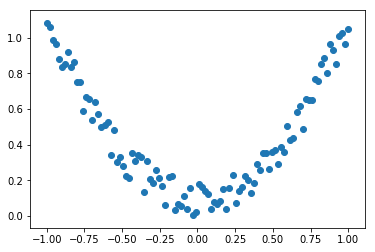

In [5]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

# unsqueeze把以为数据变成二维，torch只能处理二维数据
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
# y是x二次方+噪点
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# 用 Variable 来修饰这些数据 tensor
x, y = torch.autograd.Variable(x), Variable(y)

# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

#### 创建神经网络的通用模式

In [ ]:
class Net(torch.nn.Module):  # 继承 torch 的 Module
    def __init__(self):
        super(Net, self).__init__()     # 继承 __init__ 功能
        
    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        pass

#### 建立神经网路 + 训练神经网络

In [ ]:

import torch
from torch.autograd import Variable
import torch.nn.functional as F     # 激励函数都在这
import matplotlib.pyplot as plt


#### 建立数据集
# unsqueeze把以为数据变成二维，torch只能处理二维数据
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
# y是x二次方+噪点
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# 用 Variable 来修饰这些数据 tensor
x, y = torch.autograd.Variable(x), Variable(y)


#### 建立神经网络
class Net(torch.nn.Module):  # 继承 torch 的 Module
    ##### 定义
    def __init__(self, n_feature, n_hidden, n_output):# n_feature, n_hidden, n_output分别是输入层、隐藏层、输出层
        super(Net, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出
    #### 搭建
    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        # 预测时这里不用激励函数
        x = self.predict(x)             # 输出值
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)# 输入值：1；隐藏层：10；输出层：1

print(net)  # net 的结构


plt.ion()   # 设置plt为实时打印的方式
plt.show()


#### 训练网络
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)  # 优化器： 传入 net 的所有参数, lr是学习率
loss_func = torch.nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)

for t in range(100):
    prediction = net(x)     # 喂给 net 训练数据 x, 输出预测值

    loss = loss_func(prediction, y)     # 计算两者的误差；prediction在前，真实值y在后

    optimizer.zero_grad()   # 清空上一步的残余更新参数值；（将optimizer的梯度设为0）
    loss.backward()         # 误差反向传播, 计算参数更新值（反向传递）
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上（以学习效率0.5优化步骤）
    
    # 每5步plt显示一次，显示神经网络的训练过程
    if t % 5 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())# 原始数据
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)# 预测数据
        # 当前误差
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)  


# plt.ioff()
# plt.show()
    
    


## 区分类型（分类）

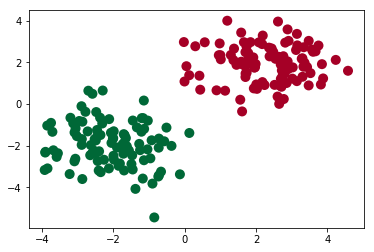

Net (
  (hidden): Linear (2 -> 10)
  (out): Linear (10 -> 2)
)


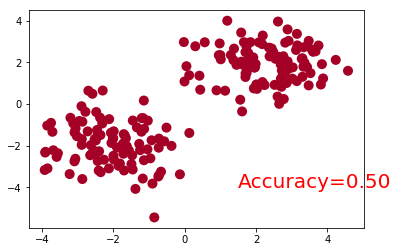

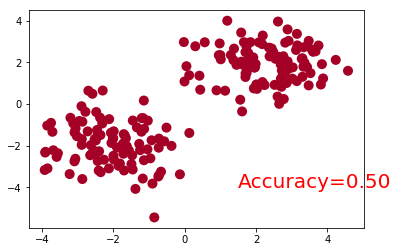

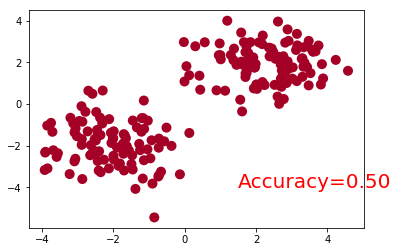

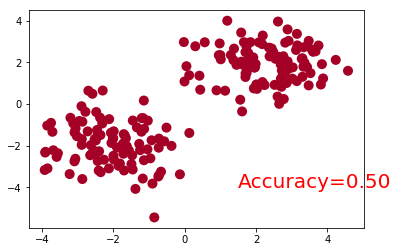

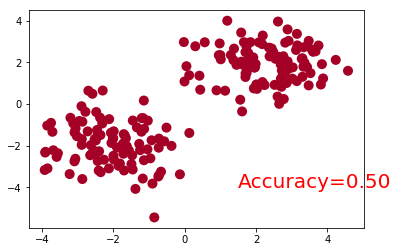

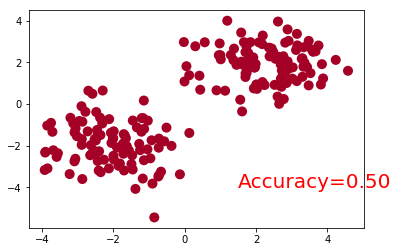

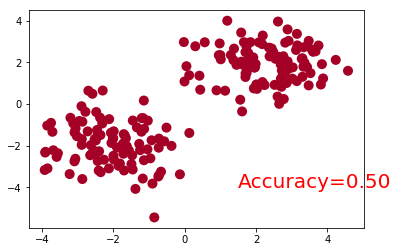

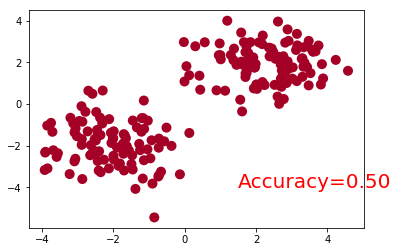

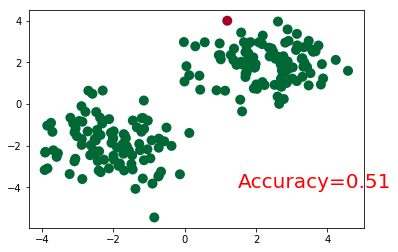

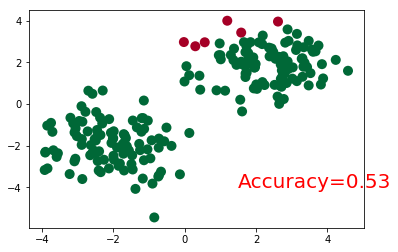

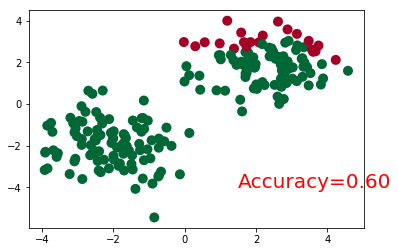

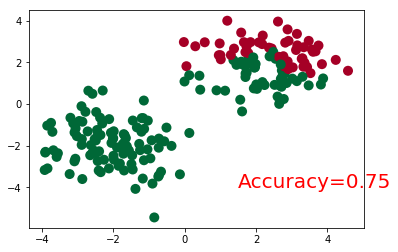

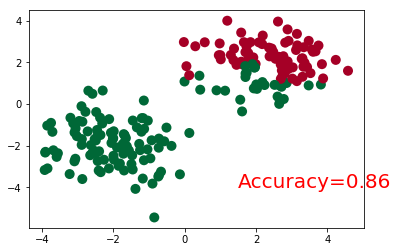

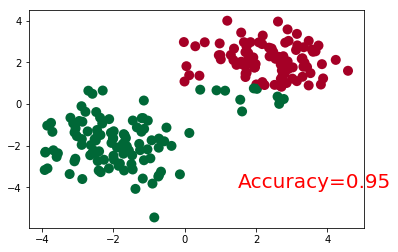

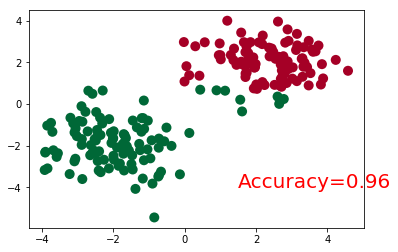

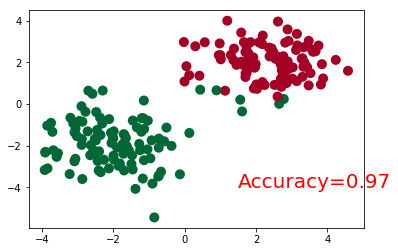

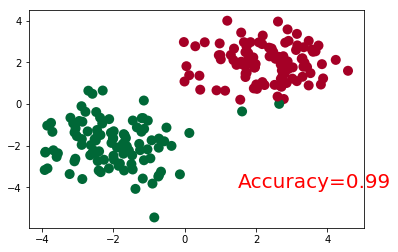

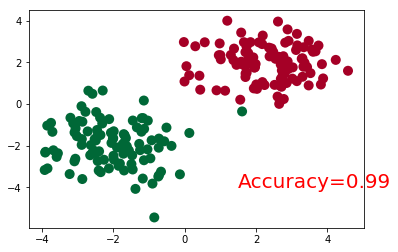

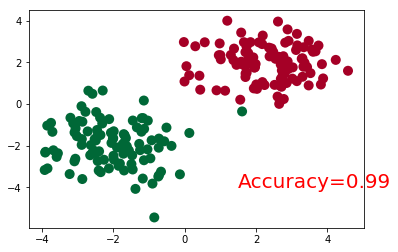

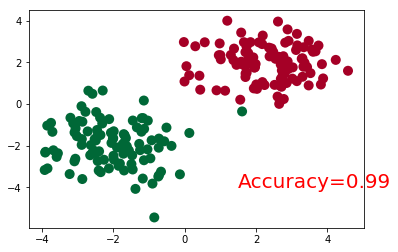

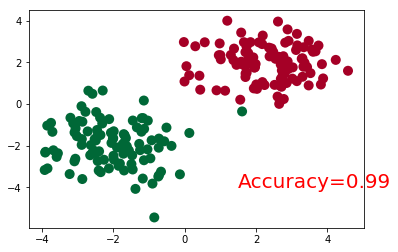

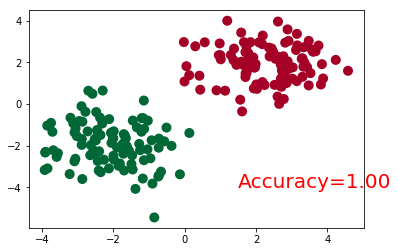

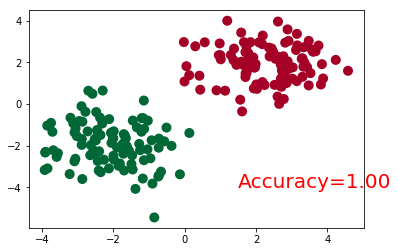

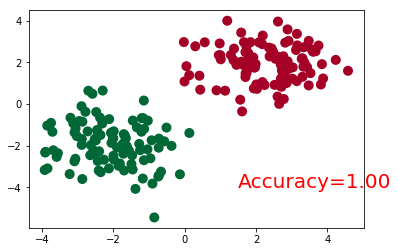

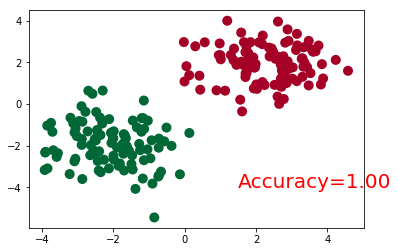

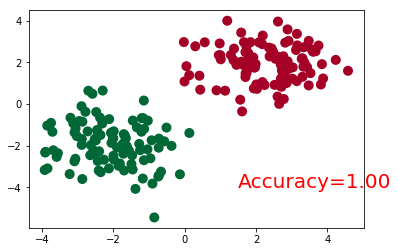

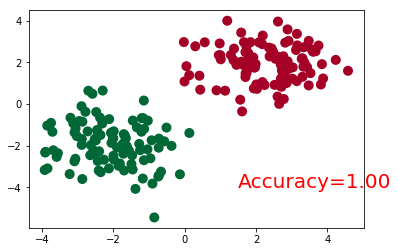

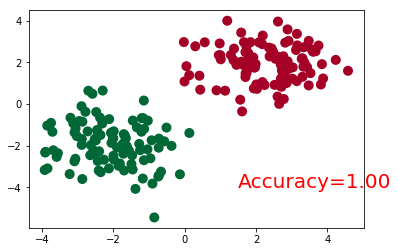

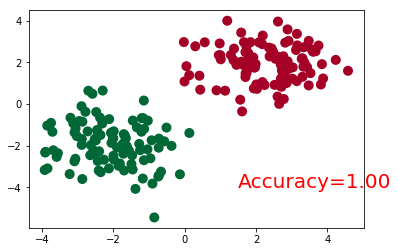

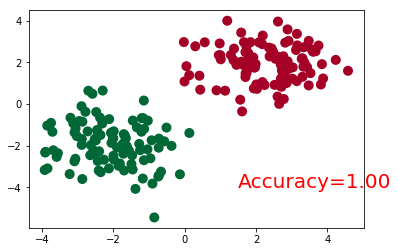

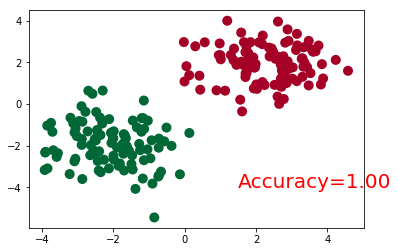

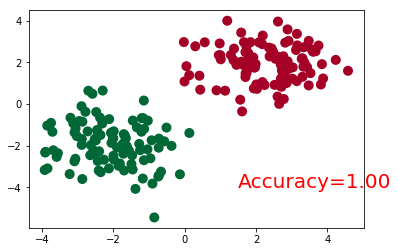

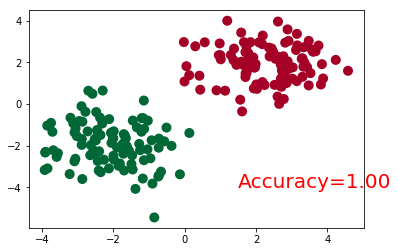

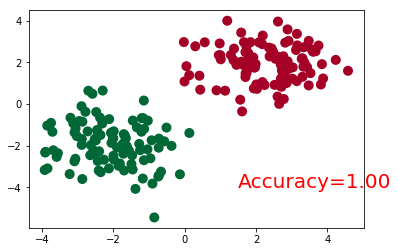

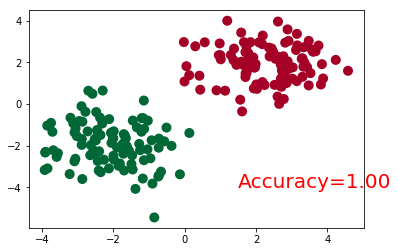

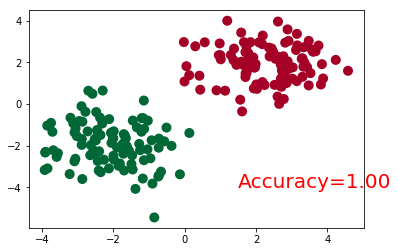

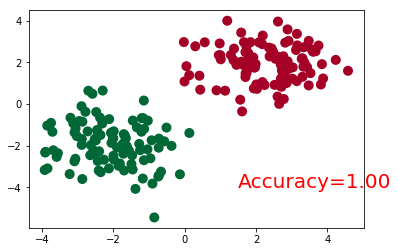

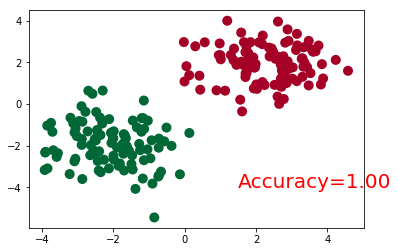

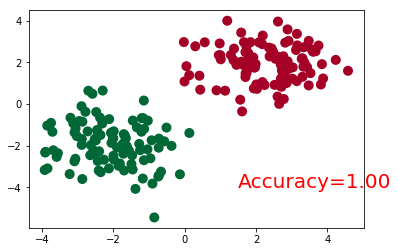

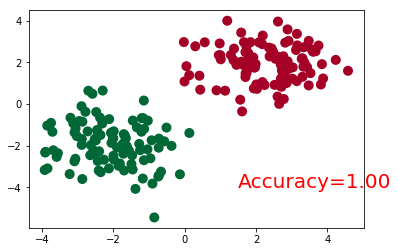

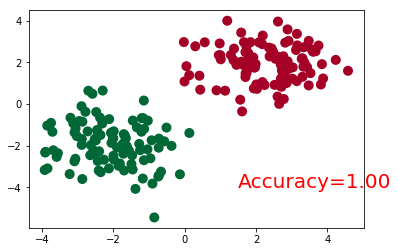

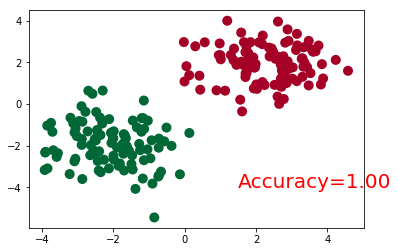

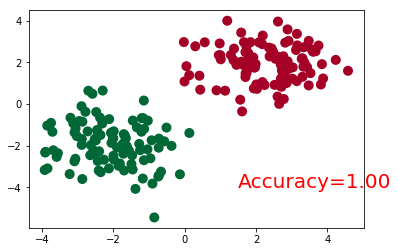

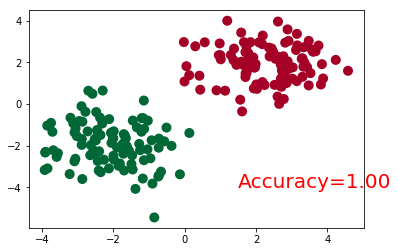

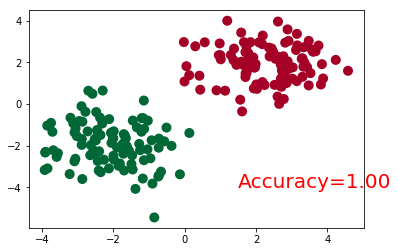

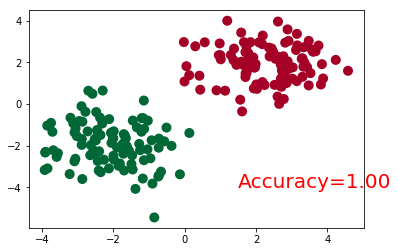

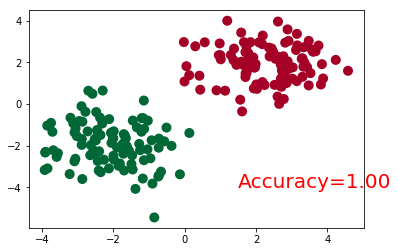

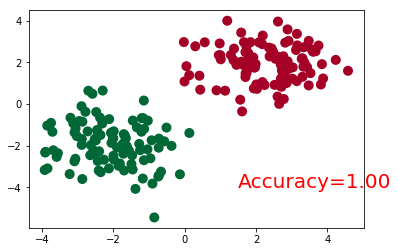

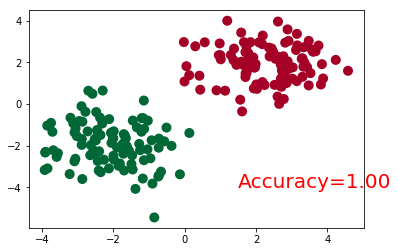

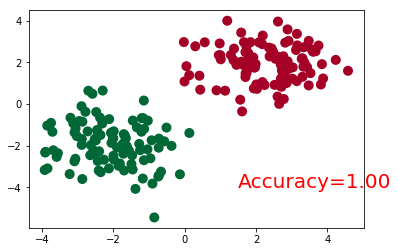

In [28]:
### 建立数据集
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn.functional as F     # 激励函数都在这

# 假数据
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(2*n_data, 1)      # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, 1)

# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
# pytorch规定的标签类型必须是LongTensor
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # LongTensor = 64-bit integer

# torch 只能在 Variable 上训练, 所以把它们变成 Variable
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

# 画图
# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()


### 建立神经网络
class Net(torch.nn.Module):     # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.out = torch.nn.Linear(n_hidden, n_output)       # 输出层线性输出

    def forward(self, x):
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.out(x)                 # 输出值, 但是这个不是预测值, 预测值还需要再另外计算
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2) # 几个类别就几个 output

print(net)  # net 的结构

### 训练神经网络
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)  # 传入 net 的所有参数, 学习率
# 算误差的时候, 注意真实值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
# 但是预测值是2D tensor (batch, n_classes)
# 回归问题：loss_func = torch.nn.MSELoss()
# 分类问题：特别是多分类：CrossEntropyLoss更加合适，输出的概率，例如[0.1, 0.2, 0.7]
loss_func = torch.nn.CrossEntropyLoss()
# 标签误差形式[0, 0, 1]

plt.ion()   # 画图
plt.show()

for t in range(100):
    out = net(x)     # 喂给 net 训练数据 x, 输出分析值,输出类似：[-2,-.12,20]，需要softmax转换为概率

    loss = loss_func(out, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上
    
    #### 画图
    if t % 2 == 0:
        plt.cla()
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        prediction = torch.max(F.softmax(out), 1)[1]#索引为0：返回最大值；索引为1：返回最大值位置
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()
    

- 有两个类型，所以输出层2

`net = Net(2, 10, 2)# 输入层：2；隐藏层10；输出层：2`

- 二分类
    - [0, 1]:分类为1
    - [1, 0]:分类为0
- 三分类
    - [1, 0, 0]:分类为0
    - [0, 1, 0]：分类为1
    - [0, 0, 1]：分类为2


## 快速搭建法

In [36]:
### 方法一
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = F.relu(self.hidden(x))#（方法，function）
        x = self.predict(x)
        return x

net1 = Net(1, 10, 1)   # 这是我们用这种方式搭建的 net1
print(net1)

Net (
  (hidden): Linear (1 -> 10)
  (predict): Linear (10 -> 1)
)


In [35]:
### 方法二
net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),#激励函数(类)
    torch.nn.Linear(10, 1)
)
print(net2)

Sequential (
  (0): Linear (1 -> 10)
  (1): ReLU ()
  (2): Linear (10 -> 1)
)


我们会发现 net2 多显示了一些内容, 这是为什么呢? 原来他把激励函数也一同纳入进去了, 但是 net1 中, 激励函数实际上是在 forward() 功能中才被调用的. 这也就说明了, 相比 net2, net1 的好处就是, 你可以根据你的个人需要更加个性化你自己的前向传播过程, 比如(RNN). 不过如果你不需要七七八八的过程, 相信 net2 这种形式更适合你.

## 保存提取

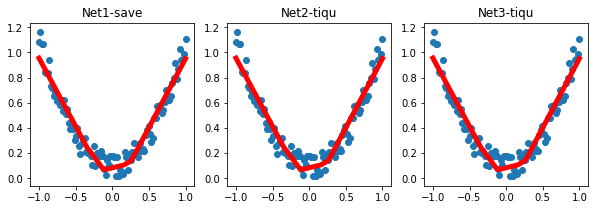

In [44]:
import torch
# from torch.autograd import Variable
import matplotlib.pyplot as plt
# import torch.nn.functional as F     # 激励函数都在这
torch.manual_seed(1)    # reproducible

# 假数据
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)


def save():
    # 建网络
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    # 训练
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    #### 两种方式进行保存
    torch.save(net1, 'net.pkl')  # 保存整个网络
    # state_dict代表各种参数
    torch.save(net1.state_dict(), 'net_params.pkl')   # 只保存网络中的参数 (速度快, 占内存少)
    
    #画图
    plt.figure(1,figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1-save')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(),'r-',lw=5)
    
### 方法一提取   
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x) 
    
    plt.subplot(132)
    plt.title('Net2-tiqu')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(),'r-',lw=5)

### 方法二提取
def restore_params():
    # 新建 net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # 将保存的参数复制到 net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)
    
    plt.subplot(133)
    plt.title('Net3-tiqu')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(),'r-',lw=5)
    
    
    
# 保存 net1 (1. 整个网络, 2. 只有参数)
save()

# 提取整个网络
restore_net()

# 提取网络参数, 复制到新网络
restore_params()

## 批训练

In [ ]:
import torch
# 进行小批训练的模块
import torch.utils.data as Data

torch.manual_seed(1)    # reproducible

# 
BATCH_SIZE = 5    # 批训练的数据个数
# BATCH_SIZE = 8

x = torch.linspace(1, 10, 10)       # this is x data (torch tensor)
y = torch.linspace(10, 1, 10)       # this is y data (torch tensor)

torch_dataset = Data.TensorDataset(data_tensor=x, target_tensor=y)
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2,              # subprocesses for loading data
)

for epoch in range(3):   # train entire dataset 3 times
    for step, (batch_x, batch_y) in enumerate(loader):  # for each training step
        # train your data...
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
              batch_x.numpy(), '| batch y: ', batch_y.numpy())